In [227]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 2.1.0
Default GPU Device: /device:GPU:0


In [228]:
from keras.datasets import imdb

In [229]:
vocabSize = 5000
(xTrain, yTrain), (xTest, yTest) = imdb.load_data(num_words=vocabSize)

In [230]:
import random

x = random.randrange(0, 25000)
print(x)

w2i = imdb.get_word_index()
i2w = {i:w for w,i in w2i.items()}

print('Review :  \n'.upper())
_ = [print(i2w[i], end=' ') for i in xTrain[x]]

print('\n\nAnswer :  \n'.upper())
ans = 'Positive' if yTrain[x] == 1 else 'Negative'
print(ans)

24637
REVIEW :  

the wonder can other only sounds are minute and lot later and i i of father lot br and and and full br of and awe we've this of and and to marie and stunning br make and take uncomfortable lot by with is and pointless br unrealistic mainly br and lot seen it is and extent br and are is wedding cutting i i movie this lot by going and and and is and argue and film of 'the br of without to of rendition br of nice and streep to puts and movie of amount br having scenes prom while appeal real see at plays film of reviews definitely and and simple really usa it are of and year years film as younger are balance without and it innocent film dennis and this and of without move this be and mess than name weird motivations not years all else find any lot br for and successfully film of happy br and are of goes and she just so and i i not out movie lot by way want remain and roger kid br and to comedy germany lot seen provided and movie and lighting this give appeal more it is an

In [232]:
from keras.preprocessing import sequence
from keras.utils import to_categorical

yTrain = to_categorical( yTrain , num_classes=2 ) 
yTest = to_categorical( yTest , num_classes=2 )

maxLen = 120
xTrain = sequence.pad_sequences(xTrain, maxlen=maxLen)
xTest = sequence.pad_sequences(xTest, maxlen=maxLen)

In [233]:
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dense
from keras.layers import Dropout
from keras import Sequential

model = Sequential()
model.add(Embedding(5000, 10, input_length=120))
model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(Dense( 32 , activation='relu' ))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

In [234]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 120, 10)           50000     
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                5504      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 56,626
Trainable params: 56,626
Non-trainable params: 0
_________________________________________________

In [235]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [236]:
batch_size = 1000
num_epochs = 10

print(len(xTrain))
print(len(yTrain))

xValidTrain, yValidTrain = xTrain[:batch_size], yTrain[:batch_size]
xTrain, yTrain = xTrain[batch_size:], yTrain[batch_size:]

print(len(xValidTrain))
print(len(yValidTrain))

print(len(xTrain))
print(len(yTrain))

25000
25000
1000
1000
24000
24000


In [237]:
history = model.fit(xTrain, yTrain, validation_data=(xValidTrain, yValidTrain), batch_size=batch_size, epochs=num_epochs)

C:\Users\aryan\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24000 samples, validate on 1000 samples
Epoch 1/10
24000/24000 [==============================] - 4s 156us/step - loss: 0.6920 - accuracy: 0.5293 - val_loss: 0.6884 - val_accuracy: 0.6250
Epoch 2/10
24000/24000 [==============================] - 3s 136us/step - loss: 0.6502 - accuracy: 0.6842 - val_loss: 0.5145 - val_accuracy: 0.7630
Epoch 3/10
24000/24000 [==============================] - 3s 137us/step - loss: 0.4502 - accuracy: 0.8109 - val_loss: 0.3885 - val_accuracy: 0.8210
Epoch 4/10
24000/24000 [==============================] - 3s 135us/step - loss: 0.3299 - accuracy: 0.8680 - val_loss: 0.3416 - val_accuracy: 0.8380
Epoch 5/10
24000/24000 [==============================] - 3s 137us/step - loss: 0.2816 - accuracy: 0.8938 - val_loss: 0.3438 - val_accuracy: 0.8390
Epoch 6/10
24000/24000 [==============================] - 3s 136us/step - loss: 0.2527 - accuracy: 0.9062 - val_loss: 0.3387 - val_accuracy: 0.8470
Epoch 7/10
24000/24000 [==============================] - 3s 13

{'val_loss': [0.6883782148361206, 0.514510452747345, 0.38851049542427063, 0.3415900766849518, 0.3438208997249603, 0.33874839544296265, 0.33381059765815735, 0.36197197437286377, 0.36360129714012146, 0.38137736916542053], 'val_accuracy': [0.625, 0.7630000114440918, 0.8209999799728394, 0.8379999995231628, 0.8389999866485596, 0.847000002861023, 0.8500000238418579, 0.8370000123977661, 0.8429999947547913, 0.8450000286102295], 'loss': [0.6919517119725546, 0.6502329731980959, 0.450176107386748, 0.3299241177737713, 0.2815990683933099, 0.25270014194150764, 0.23569412839909396, 0.2190312792857488, 0.20937715843319893, 0.20120777624348798], 'accuracy': [0.52933335, 0.68420833, 0.810875, 0.8680417, 0.89375, 0.9061667, 0.91541666, 0.92508334, 0.92854166, 0.93258333]}
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgr

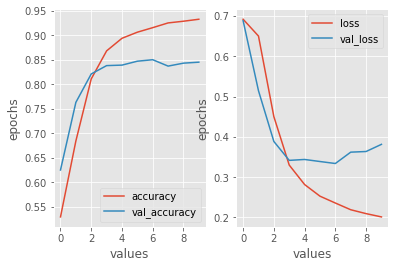

In [238]:
import matplotlib.pyplot as plt
from matplotlib import style

print(history.history)
print(style.available)

style.use('ggplot')

y = [x for x in range(10)]

plt.subplot(1,2,1)
plt.plot(y, history.history['accuracy'], label='accuracy')
plt.plot(y, history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('values')
plt.ylabel('epochs')
plt.legend(loc=0)


plt.subplot(1,2,2)
plt.plot(y, history.history['loss'], label='loss')
plt.plot(y, history.history['val_loss'], label='val_loss')
plt.xlabel('values')
plt.ylabel('epochs')
plt.legend(loc=0)


plt.show()

In [226]:
_,acc = model.evaluate(xTest, yTest, batch_size=batch_size)
print(acc)

25000/25000 [==============================] - 6s 240us/step
0.8364800214767456


In [225]:
model.save('./myModel-2.h5')

In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\aryan\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3
25000/25000 [==============================] - 189s 8ms/step - loss: 0.4901 - accuracy: 0.7558
Epoch 2/3
25000/25000 [==============================] - 205s 8ms/step - loss: 0.3121 - accuracy: 0.8751
Epoch 3/3
25000/25000 [==============================] - 204s 8ms/step - loss: 0.3277 - accuracy: 0.8600
Accuracy: 86.15%


In [2]:
model.save('./myModel-1.h5')